In [30]:
import numpy as np 

import sklearn
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import matplotlib as mpl

import keras
from keras.datasets import cifar10
from keras.applications import VGG16
from keras.preprocessing import image as kimage
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import Dense, Activation, Input, Conv2D, Flatten, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import np_utils

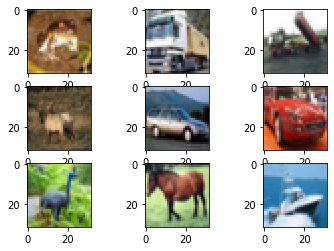

In [9]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(x_train[i])
plt.show()

In [10]:
print('x train dim:' , x_train.shape)
print('x test dim:' , x_test.shape)
print('y train dim:' , y_train.shape)
print('y test dim:' , y_test.shape)

x train dim: (50000, 32, 32, 3)
x test dim: (10000, 32, 32, 3)
y train dim: (50000, 1)
y test dim: (10000, 1)


In [11]:
#trasformazione delle etichette in array booleani
#one hot encoding

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [12]:
# convert from integers to float
X_train = x_train.astype("float32")
X_test = x_test.astype("float32")

# normalize into 0-1
X_train /= 255
X_test /= 255

In [13]:
print('x train dim:' , X_train.shape)
print('x test dim:' , X_test.shape)
print('y train dim:' , Y_train.shape)
print('y test dim:' , Y_test.shape)

x train dim: (50000, 32, 32, 3)
x test dim: (10000, 32, 32, 3)
y train dim: (50000, 10)
y test dim: (10000, 10)


In [14]:
y_train[0]

array([6], dtype=uint8)

In [15]:
Y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [16]:
x_test[0]

array([[[158, 112,  49],
        [159, 111,  47],
        [165, 116,  51],
        ...,
        [137,  95,  36],
        [126,  91,  36],
        [116,  85,  33]],

       [[152, 112,  51],
        [151, 110,  40],
        [159, 114,  45],
        ...,
        [136,  95,  31],
        [125,  91,  32],
        [119,  88,  34]],

       [[151, 110,  47],
        [151, 109,  33],
        [158, 111,  36],
        ...,
        [139,  98,  34],
        [130,  95,  34],
        [120,  89,  33]],

       ...,

       [[ 68, 124, 177],
        [ 42, 100, 148],
        [ 31,  88, 137],
        ...,
        [ 38,  97, 146],
        [ 13,  64, 108],
        [ 40,  85, 127]],

       [[ 61, 116, 168],
        [ 49, 102, 148],
        [ 35,  85, 132],
        ...,
        [ 26,  82, 130],
        [ 29,  82, 126],
        [ 20,  64, 107]],

       [[ 54, 107, 160],
        [ 56, 105, 149],
        [ 45,  89, 132],
        ...,
        [ 24,  77, 124],
        [ 34,  84, 129],
        [ 21,  67, 110]]

In [17]:
X_test[0]

array([[[0.61960787, 0.4392157 , 0.19215687],
        [0.62352943, 0.43529412, 0.18431373],
        [0.64705884, 0.45490196, 0.2       ],
        ...,
        [0.5372549 , 0.37254903, 0.14117648],
        [0.49411765, 0.35686275, 0.14117648],
        [0.45490196, 0.33333334, 0.12941177]],

       [[0.59607846, 0.4392157 , 0.2       ],
        [0.5921569 , 0.43137255, 0.15686275],
        [0.62352943, 0.44705883, 0.1764706 ],
        ...,
        [0.53333336, 0.37254903, 0.12156863],
        [0.49019608, 0.35686275, 0.1254902 ],
        [0.46666667, 0.34509805, 0.13333334]],

       [[0.5921569 , 0.43137255, 0.18431373],
        [0.5921569 , 0.42745098, 0.12941177],
        [0.61960787, 0.43529412, 0.14117648],
        ...,
        [0.54509807, 0.38431373, 0.13333334],
        [0.50980395, 0.37254903, 0.13333334],
        [0.47058824, 0.34901962, 0.12941177]],

       ...,

       [[0.26666668, 0.4862745 , 0.69411767],
        [0.16470589, 0.39215687, 0.5803922 ],
        [0.12156863, 0

In [23]:
frozen = VGG16 (weights="imagenet", input_shape=(32,32,3), include_top=False)

In [24]:
frozen.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0     

In [34]:
trainable = frozen.output
trainable = Flatten()(trainable)
#print(trainable.shape)
trainable = Dense(128, activation="relu")(trainable)
trainable = Dense(32, activation="relu")(trainable)
trainable = Dense(10, activation="softmax")(trainable)

In [35]:
model = Model(inputs=frozen.input, outputs=trainable)

In [36]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [37]:
for layer in model.layers[:-4]:
    layer.trainable = False

In [38]:
for layer in model.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001E623CF24C8> False
<keras.layers.convolutional.Conv2D object at 0x000001E62D114848> False
<keras.layers.convolutional.Conv2D object at 0x000001E62401B988> False
<keras.layers.pooling.MaxPooling2D object at 0x000001E623D0D108> False
<keras.layers.convolutional.Conv2D object at 0x000001E623FF4FC8> False
<keras.layers.convolutional.Conv2D object at 0x000001E623D41F88> False
<keras.layers.pooling.MaxPooling2D object at 0x000001E623D511C8> False
<keras.layers.convolutional.Conv2D object at 0x000001E623D5EAC8> False
<keras.layers.convolutional.Conv2D object at 0x000001E623D6E908> False
<keras.layers.convolutional.Conv2D object at 0x000001E623D78888> False
<keras.layers.pooling.MaxPooling2D object at 0x000001E623D89488> False
<keras.layers.convolutional.Conv2D object at 0x000001E623D8D6C8> False
<keras.layers.convolutional.Conv2D object at 0x000001E623D9DF08> False
<keras.layers.convolutional.Conv2D object at 0x000001E623DAF5C8> False
<ker

In [39]:
learning_rate = 0.0001
opt = Adam(lr=learning_rate)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [45]:
def evaluate_this_model(model, epochs):

    np.random.seed(1)

    history = model.fit(X_train, Y_train, epochs=epochs)
    results = model.evaluate(X_test, Y_test)

    plt.plot(np.squeeze(history.history["loss"]))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    print("\n\nAccuracy on training set is {}".format(history.history["accuracy"][-1]))
    print("\nAccuracy on test set is {}".format(results[1]))

Epoch 1/1
10000/10000 [==============================] - 97s 10ms/step


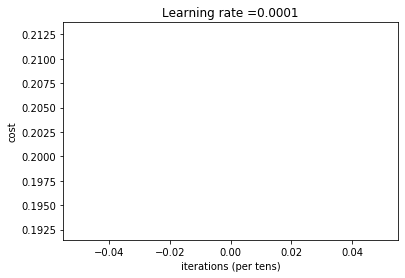



Accuracy on training set is 0.921682596206665

Accuracy on test set is 0.9216402173042297


In [47]:
evaluate_this_model(model, 1)
#model.save('vgg16.h5')

#model1=load_model('vgg16.h5')

In [48]:
trainable_2 = frozen.output
trainable_2 = Flatten()(trainable_2)
trainable_2 = Dense(128, activation="relu")(trainable_2)
trainable_2 = Dense(32, activation="relu")(trainable_2)
trainable_2 = Dense(10, activation="softmax")(trainable_2)

In [50]:
model_2 = Model(inputs=frozen.input, outputs=trainable_2)

In [51]:
model_2.summary()

Model: "model_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 32, 32, 3)         0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0   

In [52]:
for layer in model_2.layers[:-6]:
    layer.trainable = False

In [53]:
for layer in model_2.layers:
    print(layer, layer.trainable)

<keras.engine.input_layer.InputLayer object at 0x000001E623CF24C8> False
<keras.layers.convolutional.Conv2D object at 0x000001E62D114848> False
<keras.layers.convolutional.Conv2D object at 0x000001E62401B988> False
<keras.layers.pooling.MaxPooling2D object at 0x000001E623D0D108> False
<keras.layers.convolutional.Conv2D object at 0x000001E623FF4FC8> False
<keras.layers.convolutional.Conv2D object at 0x000001E623D41F88> False
<keras.layers.pooling.MaxPooling2D object at 0x000001E623D511C8> False
<keras.layers.convolutional.Conv2D object at 0x000001E623D5EAC8> False
<keras.layers.convolutional.Conv2D object at 0x000001E623D6E908> False
<keras.layers.convolutional.Conv2D object at 0x000001E623D78888> False
<keras.layers.pooling.MaxPooling2D object at 0x000001E623D89488> False
<keras.layers.convolutional.Conv2D object at 0x000001E623D8D6C8> False
<keras.layers.convolutional.Conv2D object at 0x000001E623D9DF08> False
<keras.layers.convolutional.Conv2D object at 0x000001E623DAF5C8> False
<ker

In [ ]:
learning_rate = 0.0001
opt = Adam(lr=learning_rate)
model.compile(optimizer=opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
def evaluate_this_model(model, epochs):

    np.random.seed(1)

    history = model.fit(X_train, Y_train, epochs=epochs)
    results = model.evaluate(X_test, Y_test)

    plt.plot(np.squeeze(history.history["loss"]))
    plt.ylabel('cost')
    plt.xlabel('iterations (per tens)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()

    print("\n\nAccuracy on training set is {}".format(history.history["accuracy"][-1]))
    print("\nAccuracy on test set is {}".format(results[1]))

In [ ]:
evaluate_this_model(model, 1)

In [53]:
train_preprocessing = kimage.ImageDataGenerator(preprocessing_function = vgg16.preprocess_input)
train_generator = train_preprocessing.flow(X_train)

In [55]:
test_preprocessing = kimage.ImageDataGenerator(preprocessing_function = vgg16.preprocess_input)
test_generator = train_preprocessing.flow(X_train)

In [56]:
base_model = vgg.VGG16(weights = 'imagenet',
                      include_top = False,
                      input_shape = (32,32,3))

58892288/58889256 [==============================] - 11s 0us/step


In [58]:
#blocchiamo i layer

for layer in base_model.layers: 
    layer.trainable = False

In [59]:
x = base_model.output
x = Dense(1024, activation = 'relu')(x)
pred = Dense(10, activation = 'softmax')(x)

net = Model(inputs = base_model.input, outputs = pred)

In [60]:
net.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [62]:
net.fit_generator(X_train, epochs = 2, validation_data = Y_train)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()